DATA COLLECTION

In [1]:
import pandas as pd
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.shape

(1338, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(1)

In [7]:
df=df.drop_duplicates()

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


EDA

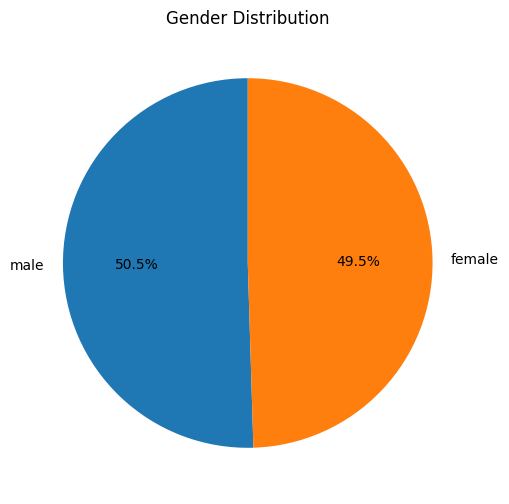

In [11]:
import matplotlib.pyplot as plt
gender_counts = df['sex'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Gender Distribution")
plt.show()

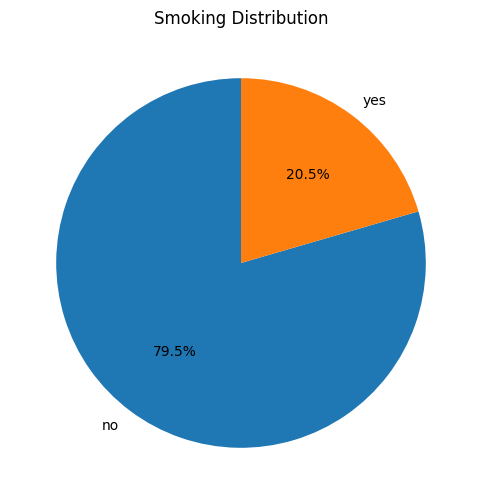

In [12]:
smoker_counts = df['smoker'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    smoker_counts,
    labels=smoker_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Smoking Distribution")
plt.show()

In [13]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

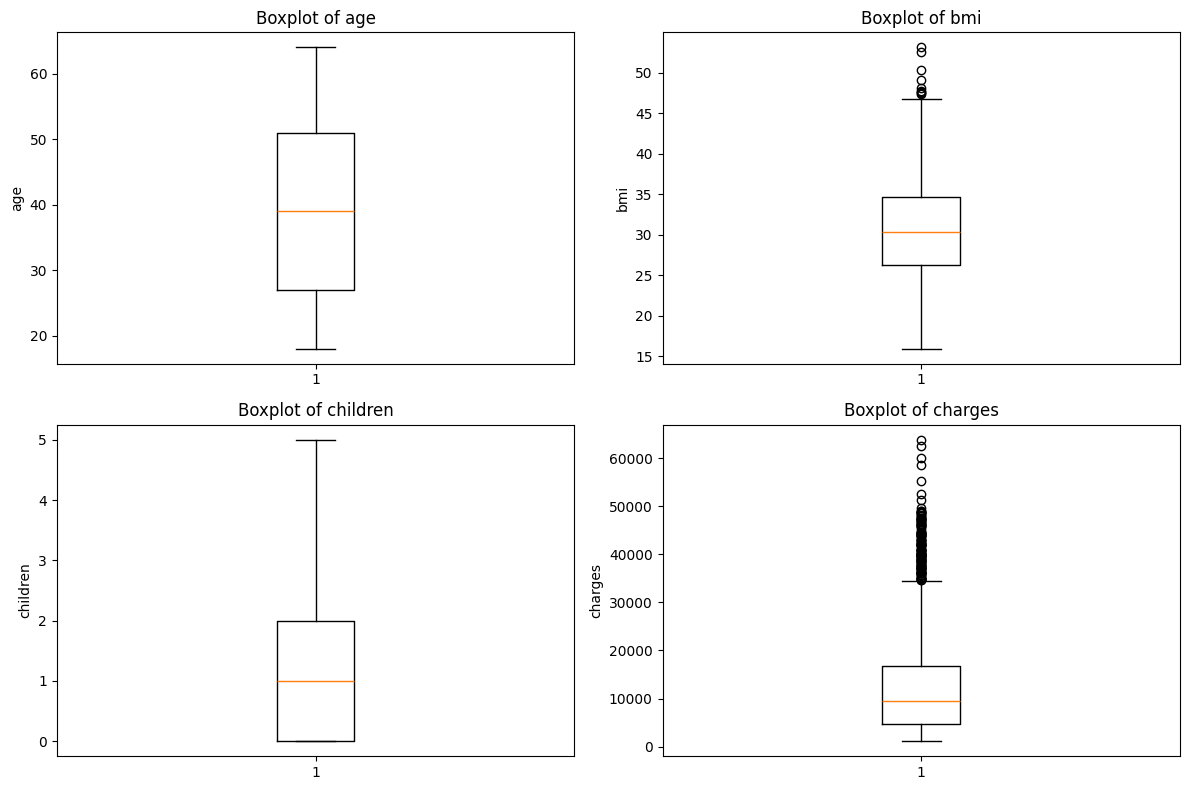

In [16]:
numerical_features = df.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)  
    plt.boxplot(df[feature], vert=True)
    plt.title(f"Boxplot of {feature}")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

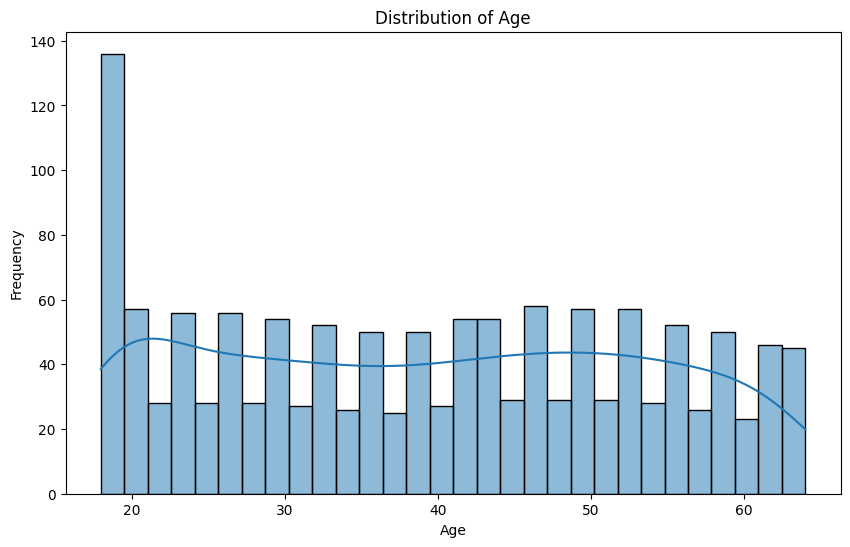

In [17]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

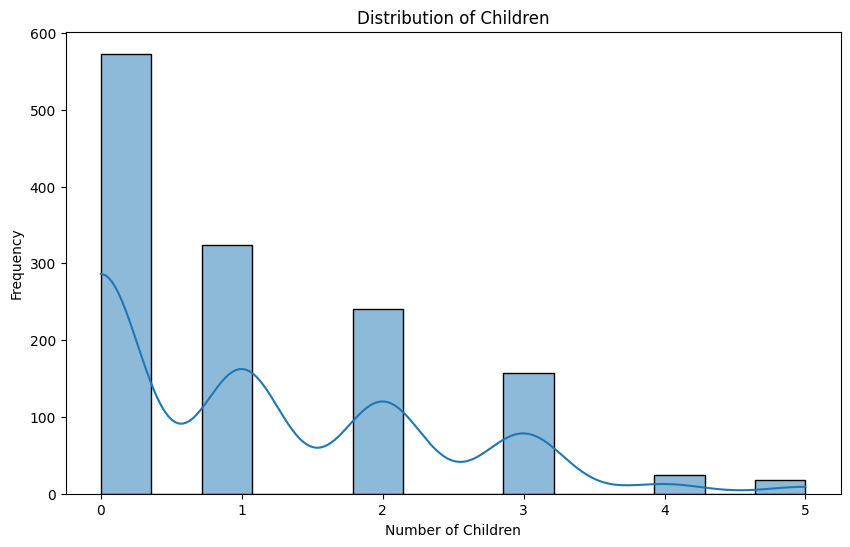

In [18]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['children'], kde=True)
plt.title('Distribution of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

In [19]:
#group people who have children with their insurance charges
children_insurance = df[df['children'] > 0].groupby('children')['charges'].mean().reset_index()
children_insurance

,children,charges
0,1,12731.171832
1,2,15073.563734
2,3,15355.318367
3,4,13850.656311
4,5,8786.035247


C:\Users\91958\AppData\Local\Temp\ipykernel_11920\2457499083.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='children', y='charges', data=children_insurance,palette="viridis")


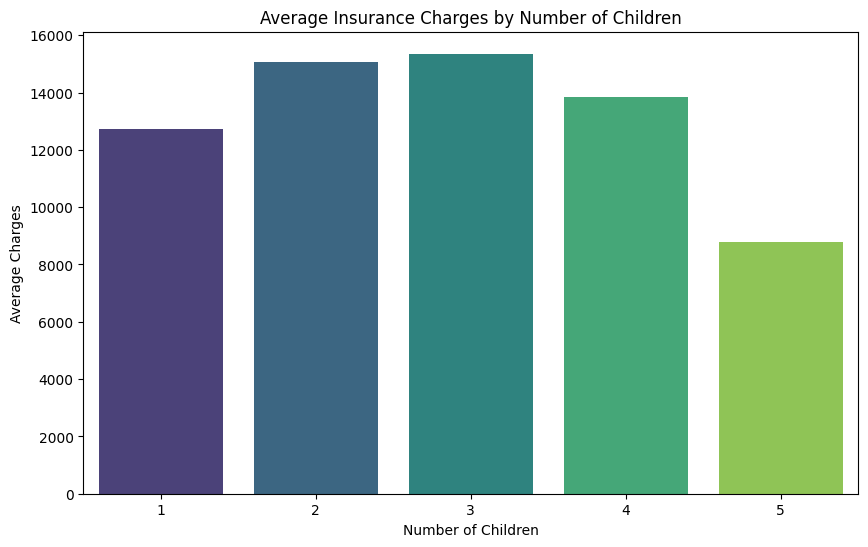

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x='children', y='charges', data=children_insurance,palette="viridis")
plt.title('Average Insurance Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()

In [22]:
grouped_charges = df.groupby("smoker")["charges"].mean()
print("Average Charges by Smoker Status:\n", grouped_charges)

Average Charges by Smoker Status:
 smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64


<Figure size 800x600 with 0 Axes>

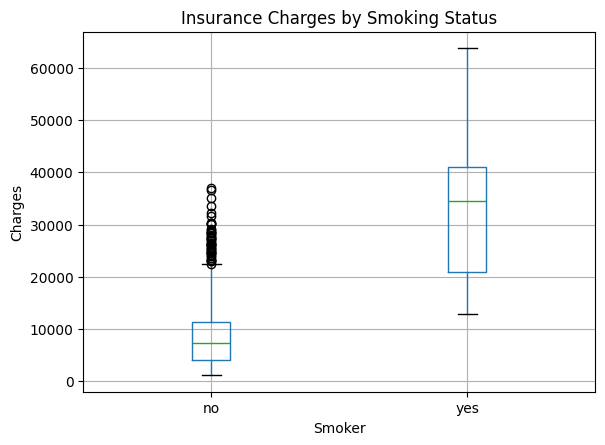

In [23]:
plt.figure(figsize=(8,6))
df.boxplot(column="charges", by="smoker")
plt.title("Insurance Charges by Smoking Status")
plt.suptitle("")  # remove default pandas title
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

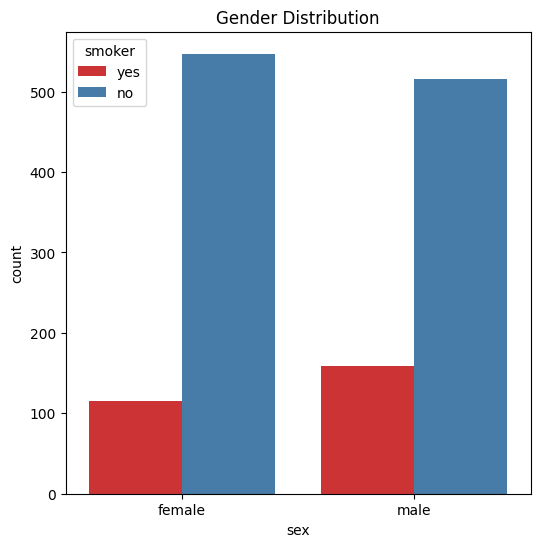

In [27]:
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data = df, hue='smoker', palette='Set1')
plt.title('Gender Distribution')
plt.show()

C:\Users\91958\AppData\Local\Temp\ipykernel_11920\4125311910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'region', data=df, palette='Set1')


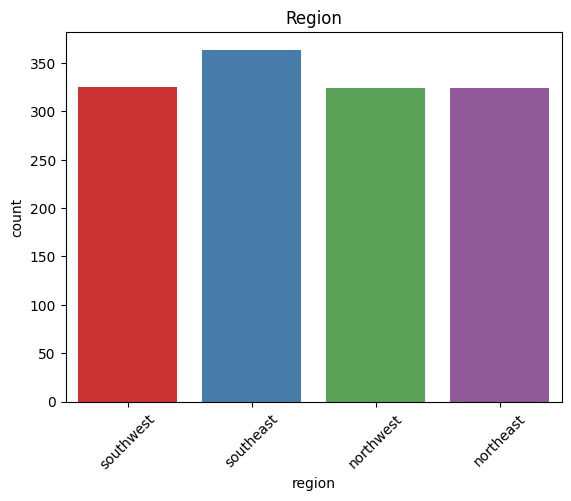

In [28]:
plt.plot(figsize=(6, 6))
sns.countplot(x= 'region', data=df, palette='Set1')
plt.title('Region')
plt.xticks(rotation=45)
plt.show()

C:\Users\91958\AppData\Local\Temp\ipykernel_11920\2808099646.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='charges', data=df,palette="Set3")


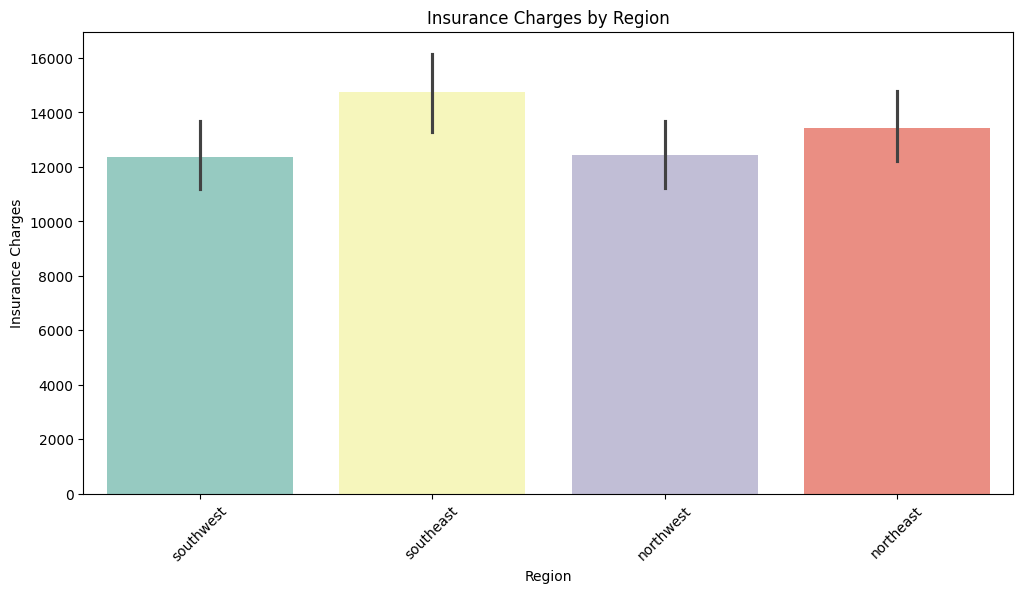

In [29]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x='region', y='charges', data=df,palette="Set3")
plt.title('Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Insurance Charges')
plt.xticks(rotation=45)
plt.show()

In [30]:
#Encoding Categorical features
# Encoding gender column
df.replace({
    'sex':{
        'male':0,
        'female':1
    }}, inplace= True)

# Encoding smoker column
df.replace({
    'smoker':{
        'no':0,
        'yes':1
    }}, inplace= True)
# Encoding region column
df.replace({
    'region':{
        'southeast':0,
        'southwest':1,
        'northwest':2,
        'northeast':3
    }}, inplace= True)

df.head()

C:\Users\91958\AppData\Local\Temp\ipykernel_11920\2847440637.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({
C:\Users\91958\AppData\Local\Temp\ipykernel_11920\2847440637.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({
C:\Users\91958\AppData\Local\Temp\ipykernel_11920\2847440637.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavio

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


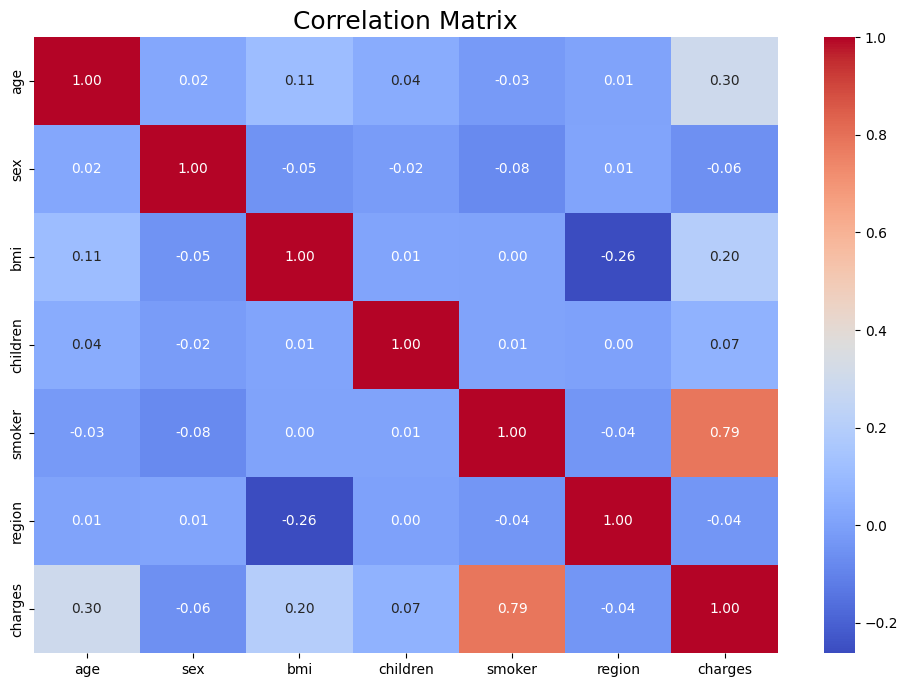

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix", fontsize=18)
plt.show()

In [33]:
df.shape

(1337, 7)

PREPROCESSING

Outliers using IQR method:
age: 0 outliers
bmi: 9 outliers
children: 0 outliers
charges: 139 outliers


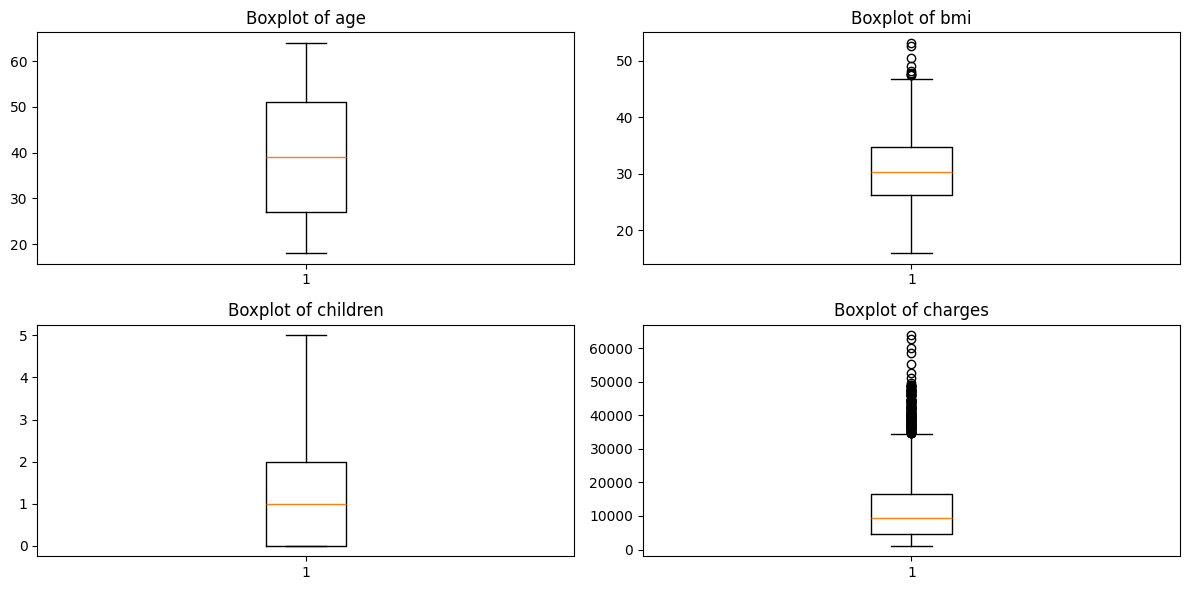

In [35]:
num_cols = ['age', 'bmi', 'children', 'charges']

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

print("Outliers using IQR method:")
for col in num_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")


plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


Original dataset shape: (1338, 7)
age: removed 0 outliers
bmi: removed 9 outliers
children: removed 0 outliers
charges: removed 138 outliers
Shape after removing outliers: (1191, 7)


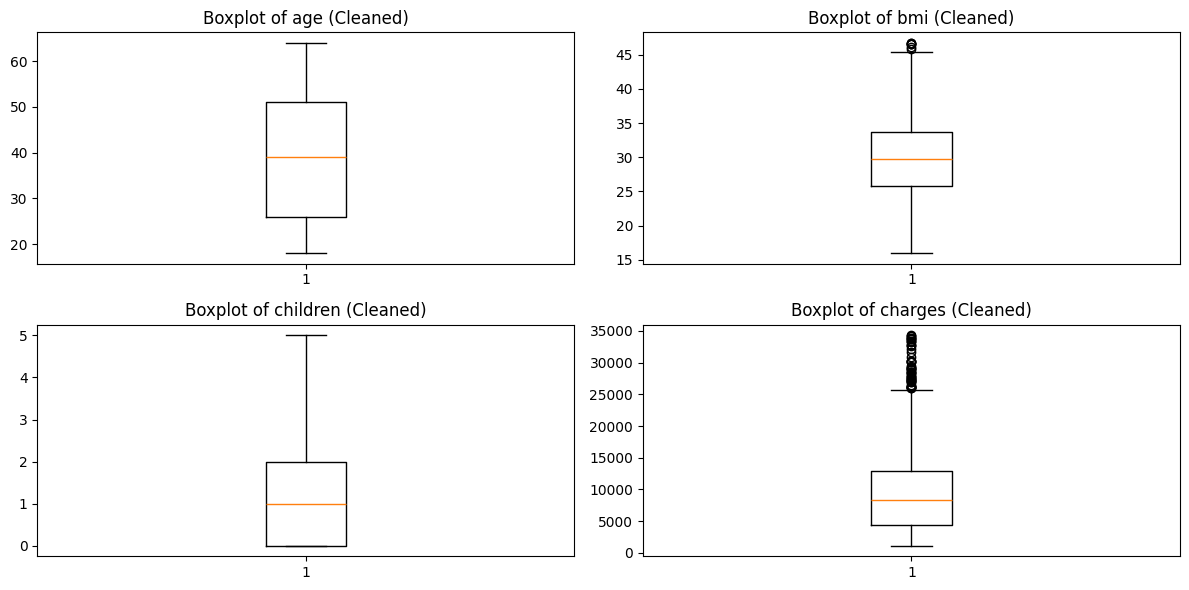

In [ ]:
num_cols = ['age', 'bmi', 'children', 'charges']

# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]
print("Original dataset shape:", df.shape)
for col in num_cols:
    before = df.shape[0]
    df = remove_outliers_iqr(df, col)
    after = df.shape[0]
    print(f"{col}: removed {before - after} outliers")
print("Shape after removing outliers:", df.shape)
df.to_csv("insurance_clean.csv", index=False)
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col} (Cleaned)")
plt.tight_layout()
plt.show()


In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("insurance_clean.csv")
num_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Scaled numerical features:\n", df[num_cols].head())
df.to_csv("insurance_scaled.csv", index=False)


Scaled numerical features:
         age       bmi  children
0 -1.424190 -0.356784 -0.894220
1 -1.495361  0.643537 -0.071814
2 -0.783654  0.512320  1.572998
3 -0.427801 -1.242076 -0.894220
4 -0.498972 -0.189779 -0.894220


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
df = pd.read_csv("insurance_clean.csv")
num_cols = ['age', 'bmi', 'children']
cat_cols = ['sex', 'smoker', 'region']
target = 'charges'
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [6]:
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

Linear Regression Performance:
MAE: 2620.93
MSE: 19877696.62
RMSE: 4458.44
R²: 0.63


In [7]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rf = RandomForestRegressor(
    n_estimators=100,  
    random_state=42
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Random Forest Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

Random Forest Performance:
MAE: 2477.89
MSE: 20187559.74
RMSE: 4493.06
R²: 0.63


In [8]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
gbr = GradientBoostingRegressor(
    n_estimators=200,  
    learning_rate=0.1, # step size
    max_depth=3,       # depth of trees
    random_state=42
)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

Gradient Boosting Performance:
MAE: 2480.33
MSE: 20474407.87
RMSE: 4524.87
R²: 0.62


In [9]:
from xgboost import XGBRegressor
xgb = XGBRegressor(
    n_estimators=300,    
    learning_rate=0.1,   
    max_depth=4,         
    random_state=42,
    objective='reg:squarederror'
)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("XGBoost Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

XGBoost Performance:
MAE: 2628.85
MSE: 22864064.47
RMSE: 4781.64
R²: 0.58


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.read_csv("insurance_clean.csv")

X = pd.get_dummies(df.drop(columns=["charges"]), drop_first=True)
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

xgb_params = {
    "n_estimators": [200, 300, 400],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 4, 5],
   
}

grid_xgb = GridSearchCV(xgb, xgb_params, cv=3, scoring="r2", n_jobs=-1, verbose=1)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
print("\n XGBoost Parameters:", grid_xgb.best_params_)
print("XGB MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("XGB RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGB R²:", r2_score(y_test, y_pred_xgb))


Fitting 3 folds for each of 27 candidates, totalling 81 fits

 XGBoost Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
XGB MAE: 2409.028617529092
XGB RMSE: 4280.282862133971
XGB R²: 0.6615725600056959


Model Comparison:

               Model     MAE    RMSE     R2
0  Linear Regression  2620.9  4458.4  0.633
1      Random Forest  2477.9  4493.0  0.627
2  Gradient Boosting  2480.3  4524.8  0.622
3     XGBoost(tuned)  2431.0  4294.1  0.659


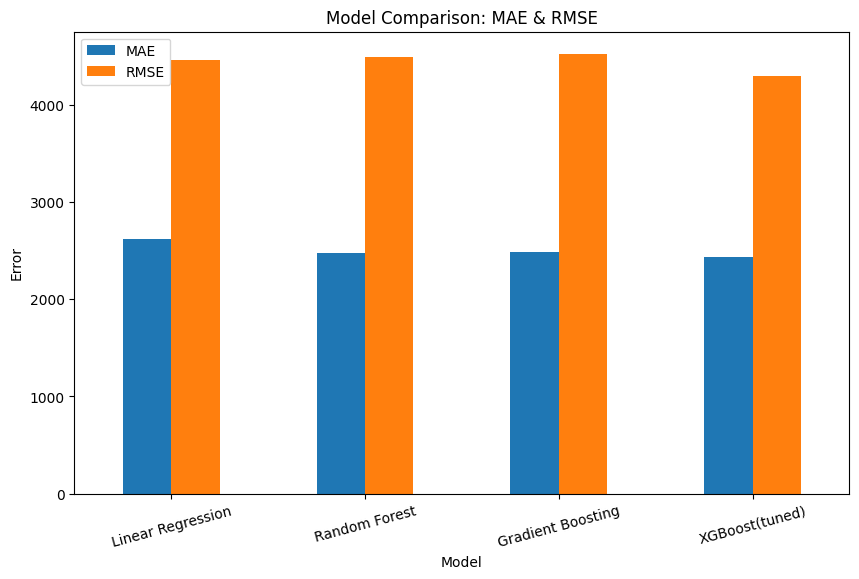

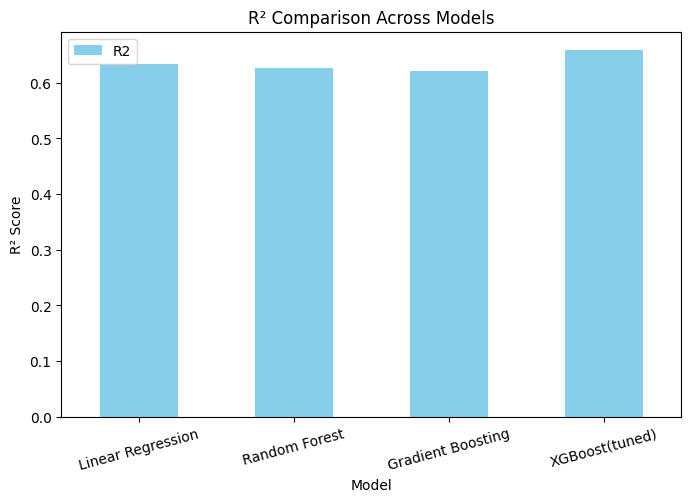

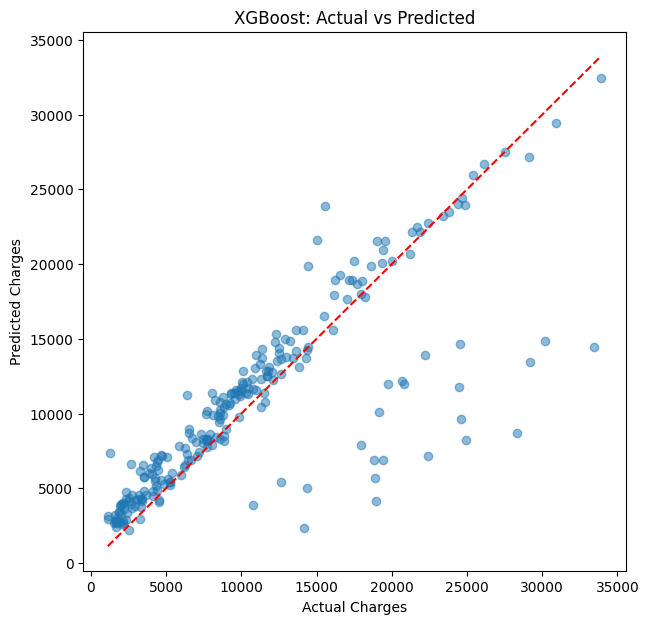

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting", "XGBoost(tuned)"],
    "MAE": [2620.9, 2477.9, 2480.3, 2431.0],
    "RMSE": [4458.4, 4493.0, 4524.8, 4294.1],
    "R2": [0.633, 0.627, 0.622, 0.659]
})

print("Model Comparison:\n")
print(results)


results.plot(x="Model", y=["MAE", "RMSE"], kind="bar", figsize=(10,6))
plt.title("Model Comparison: MAE & RMSE")
plt.ylabel("Error")
plt.xticks(rotation=15)
plt.show()

results.plot(x="Model", y="R2", kind="bar", figsize=(8,5), color="skyblue")
plt.title("R² Comparison Across Models")
plt.ylabel("R² Score")
plt.xticks(rotation=15)
plt.show()


plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45° line
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("XGBoost: Actual vs Predicted")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

df = pd.read_csv("insurance_clean.csv")
X = pd.get_dummies(df.drop(columns=["charges"]), drop_first=True)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=42)
}
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring="r2") 
    cv_results[name] = {
        "Mean R²": np.mean(scores),
        "Std R²": np.std(scores)
    }
cv_df = pd.DataFrame(cv_results).T
print("\nCross-Validation Results:")
print(cv_df)



Cross-Validation Results:
                    Mean R²    Std R²
Linear Regression  0.596760  0.072102
Random Forest      0.572576  0.078918
Gradient Boosting  0.621457  0.075596
XGBoost            0.481133  0.122119
